## Derivslib testing

In [2]:
import os
import sys

while os.getcwd().split('/')[-1] in ['examples', 'derivslib']:
    os.chdir('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import derivslib as dl

#### Black-Scholes Options

In [3]:
bs_call = dl.BSOption(s=100,k=110,sigma=0.3,t='03-17-2023',r=0.04, type='C')
bs_call

+1 BSOption(s=100, k=110, t=0.1786, sigma=0.3, r=0.04, type=C)

In [4]:
bs_call.summary()

parameters           characteristics / greeks          
                                                         
0          S       100                    price  1.901955
1          K       110                    delta  0.263307
2         IV       0.3                    gamma  0.025753
3          t  0.178571                     vega  0.137961
4          r      0.04                    theta -0.034427
5                                           rho  0.043617

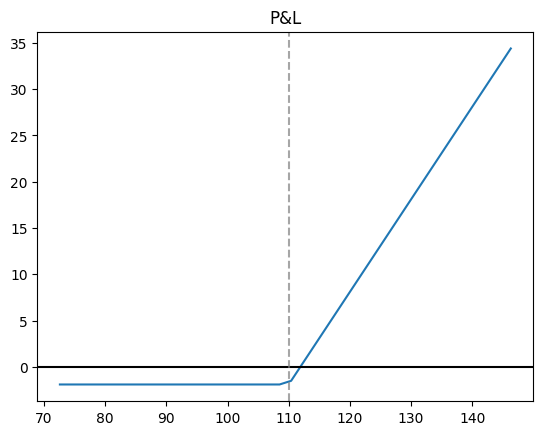

In [5]:
bs_call.plot('pnl')

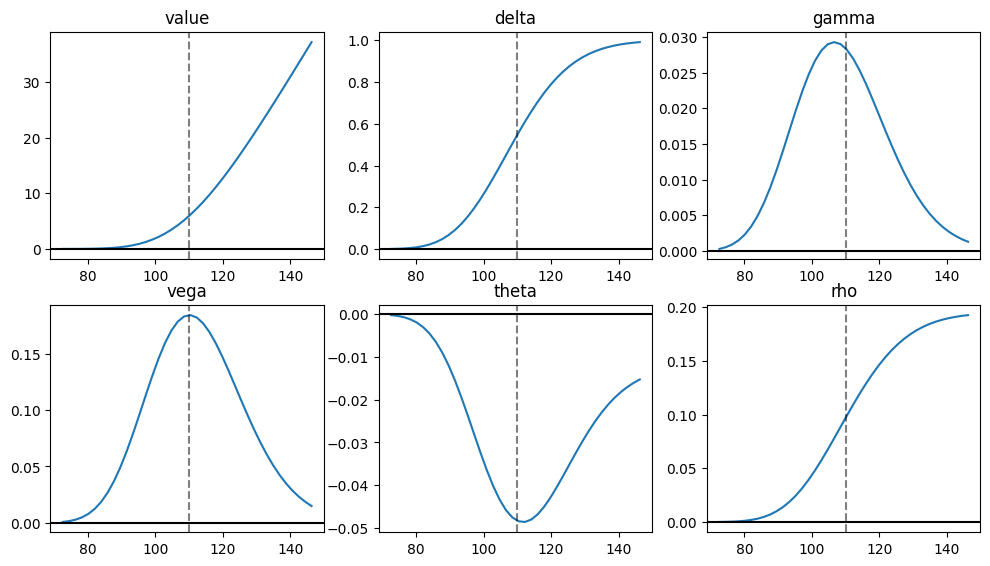

In [6]:
bs_call.plot('summary')

In [7]:
bs_call.plot('delta',interactive=True)

interactive(children=(FloatSlider(value=2.0, description='t', max=2.0, min=0.001, step=0.001), FloatSlider(val…

#### Binomial Tree Options

In [8]:
put = dl.BinomialOption(s=100,k=110,sigma=0.3,t='03-17-2023',r=0.04,type='put',style='A',n=100)
put

+1 BinomialOption(s=100, k=110, t=0.1786, sigma=0.3, r=0.04, type=P, style=A)

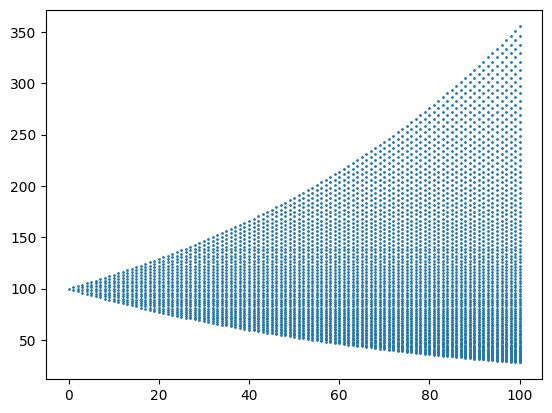

In [9]:
put.show_tree()

In [10]:
put.summary()

parameters           characteristics / greeks           
                                                          
0          S       100                    price  11.311249
1          K       110                    delta  -0.755114
2         IV       0.3                    gamma   0.028621
3          t  0.178571                     vega   0.135747
4          r      0.04                    theta  -0.025499
5                                           rho  -0.091739

In [11]:
put.value(n=500)

11.308889238278466

#### Monte-Carlo Options

In [12]:
mc_call = dl.MCOption(s=100,k=110,sigma=0.3,t='03-17-2023',r=0.04,type='call',N=20,M=2e5,control='all')
mc_call

+1 MonteCarloOption(s=100, k=110, t=0.1786, sigma=0.3, r=0.04, type=C, qty=1, N=20, M=200000)

In [13]:
mc_call.analytics()

,stats
Value,1.903320
N (steps),20.000000
M (simulations),200000.000000
Std. Err.,0.000003
Compute Time (ms),274.570000


#### Option Combinations

##### Basic Combinations

In [14]:
s = 100
call1 = dl.BSOption(s=s,k=100,sigma=0.3,t='03-17-2023',r=0.04,type='call')
call2 = dl.BSOption(s=s,k=110,sigma=0.3,t='03-17-2023',r=0.04,type='call')
p = call1 - call2

In [15]:
p.plot('pnl',interactive=True)

interactive(children=(FloatSlider(value=2.0, description='t', max=2.0, min=0.001, step=0.01), Output(layout=La…

In [16]:
p.plot('gamma',interactive=True)

interactive(children=(FloatSlider(value=2.0, description='t', max=2.0, min=0.001, step=0.01), Output(layout=La…

##### Some more advanced operations

In [17]:
s = 100
call1 = dl.BSOption(s=s,k=90,sigma=0.3,t='03-17-2023',r=0.04,type='call')
call2 = dl.BSOption(s=s,k=100,sigma=0.3,t='03-17-2023',r=0.04,type='call')
call3 = dl.BSOption(s=s,k=110,sigma=0.3,t='03-17-2023',r=0.04,type='call')

In [18]:
portfolio = call1 - (call2*2) + call3
portfolio

OptionPortfolio(
+1 BSOption(s=100, k=90, t=0.1786, sigma=0.3, r=0.04, type=C)
-2 BSOption(s=100, k=100, t=0.1786, sigma=0.3, r=0.04, type=C)
+1 BSOption(s=100, k=110, t=0.1786, sigma=0.3, r=0.04, type=C)
)

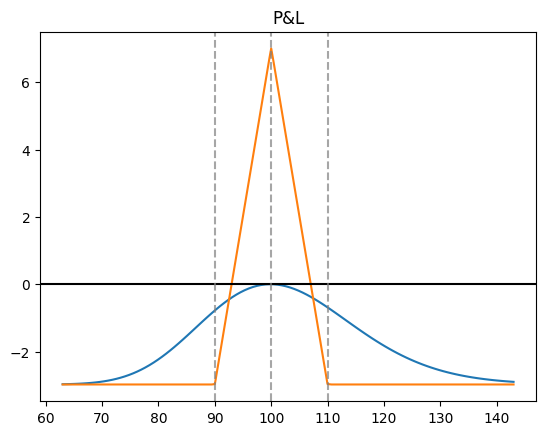

In [19]:
portfolio.plot('pnl',resolution=110)

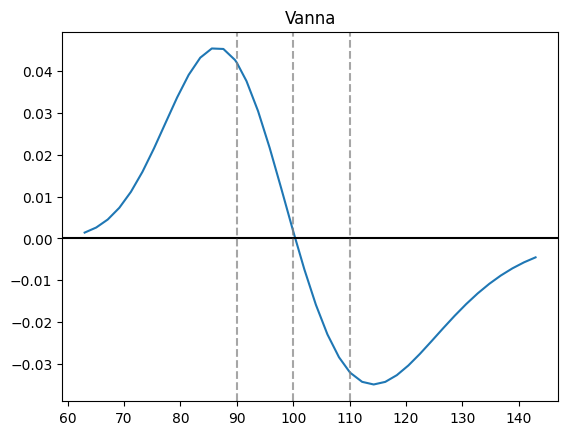

In [20]:
portfolio.plot('vanna')

In [21]:
portfolio.plot('vega',resolution=50,interactive=True)

interactive(children=(FloatSlider(value=2.0, description='t', max=2.0, min=0.001, step=0.01), Output(layout=La…

##### Light Exotics

In [22]:
digi = dl.DigitalOption(s=100,k=100,sigma=0.3,t='03-17-2023',r=0.04,type='call')
digi

+1 DigitalOption(s=100, k=100, t=0.1786, sigma=0.3, r=0.04, type=call)

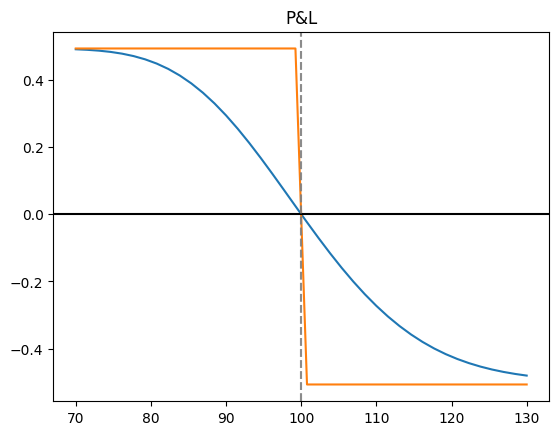

In [23]:
digi.plot()

In [35]:
barrier = dl.BarrierOption(
    s=100,
    k=100,
    sigma=0.3,
    t='03-17-2023',
    r=0.04,
    type='call',
    style='A',
    barrier=120,
    barrier_type='KI',
    method='binomial',
    n=1000
    )
barrier

+1 BarrierOption(s=100, k=100, t=0.1786, sigma=0.3, r=0.04, barrier=120, barrier_type=KI, type=C, style=A)

In [36]:
barrier.summary()

parameters           characteristics / greeks          
                                                         
0          S       100                    price  2.907141
1          K       100                    delta  0.437676
2         IV       0.3                    gamma  0.021613
3          t  0.178571                     vega  0.089331
4          r      0.04                    theta -0.023953
5                                           rho  0.054247

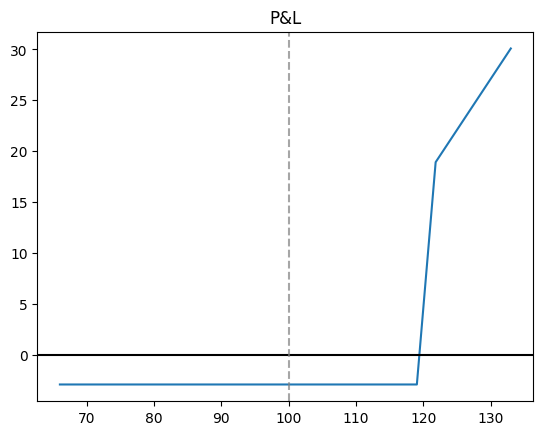

In [37]:
barrier.plot('pnl')

#### Volatility Surface

In [27]:
spy_surf = dl.VolSurface('SPY',moneyness=True) # Moneyness makes strikes in terms of percent ITM or OTM rather than dollar value

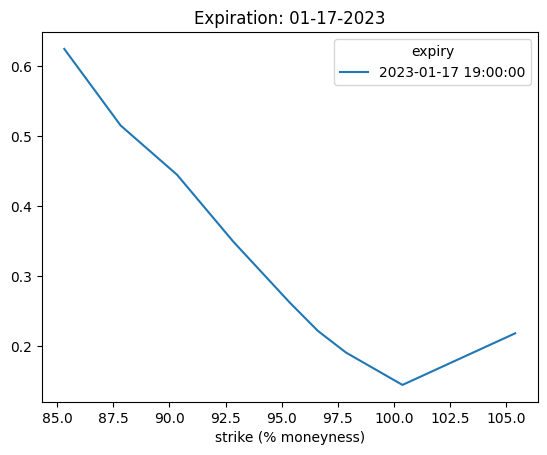

In [38]:
spy_surf.skew_plot(1) # The first call makes it download the data

In [29]:
spy_surf.surface_plot()

In [30]:
spy_surf.surface_table.query('strike > 80 & strike < 120')

expiry,2023-01-16 19:00:00,2023-01-17 19:00:00,2023-01-18 19:00:00,2023-01-19 19:00:00,2023-01-26 19:00:00,2023-02-02 19:00:00,2023-02-09 19:00:00,2023-02-16 19:00:00,2023-02-23 19:00:00,2023-03-16 20:00:00,2023-03-30 20:00:00,2023-04-20 20:00:00,2023-05-18 20:00:00,2023-06-15 20:00:00,2023-06-29 20:00:00,2023-09-14 20:00:00,2023-09-28 20:00:00,2023-12-14 19:00:00,2023-12-28 19:00:00,2024-01-18 19:00:00
strike,,,,,,,,,,,,,,,,,,,,
85.319950,0.687503,0.625004,0.566411,0.507817,0.360358,0.322761,0.291999,0.281990,0.269294,0.260383,0.257271,0.249641,0.245308,0.242195,0.241096,0.233864,0.236397,0.233727,0.228264,0.231239
87.829360,0.578129,0.515630,0.480474,0.445318,0.317390,0.287605,0.262947,0.256599,0.246223,0.243965,0.242989,0.236214,0.233070,0.230904,0.230141,0.226555,0.224404,0.224739,0.217598,0.215752
90.338770,0.507817,0.445318,0.400397,0.367194,0.270515,0.253670,0.236336,0.234871,0.226570,0.228645,0.229317,0.223641,0.221291,0.219917,0.219490,0.215859,0.217354,0.215553,0.216927,0.214684
92.848181,0.394537,0.349616,0.326179,0.297859,0.229988,0.228035,0.215706,0.215950,0.210274,0.214607,0.215828,0.211098,0.209664,0.209023,0.208657,0.205483,0.207619,0.206429,0.208145,0.206185
95.357591,0.291023,0.262703,0.247078,0.234383,0.195076,0.207405,0.197396,0.198861,0.194222,0.200447,0.201607,0.198372,0.197365,0.197503,0.197686,0.196724,0.197564,0.197091,0.199303,0.196343
96.612296,0.234383,0.222176,0.212898,0.205330,0.181527,0.198067,0.188607,0.190438,0.186043,0.192788,0.194344,0.191048,0.191460,0.191506,0.191842,0.191384,0.192299,0.192284,0.196145,0.192894
97.867001,0.177743,0.191170,0.185067,0.182625,0.169198,0.188973,0.179665,0.181893,0.177621,0.185341,0.186654,0.184548,0.184975,0.184868,0.185830,0.185891,0.186898,0.187378,0.192528,0.187050
100.376412,0.118173,0.145028,0.151742,0.154427,0.156869,0.187203,0.182229,0.190865,0.189888,0.198677,0.199013,0.205330,0.216713,0.225670,0.224159,0.239311,0.239098,0.252701,0.256958,0.257408
105.395232,0.265632,0.218758,0.203133,0.183602,0.149423,0.163583,0.158944,0.164315,0.162606,0.169991,0.171273,0.176842,0.188347,0.196267,0.195900,0.213539,0.214607,0.229820,0.236053,0.235336


#### Dealer Gamma

In [39]:
gex = dl.GEX('SPY')

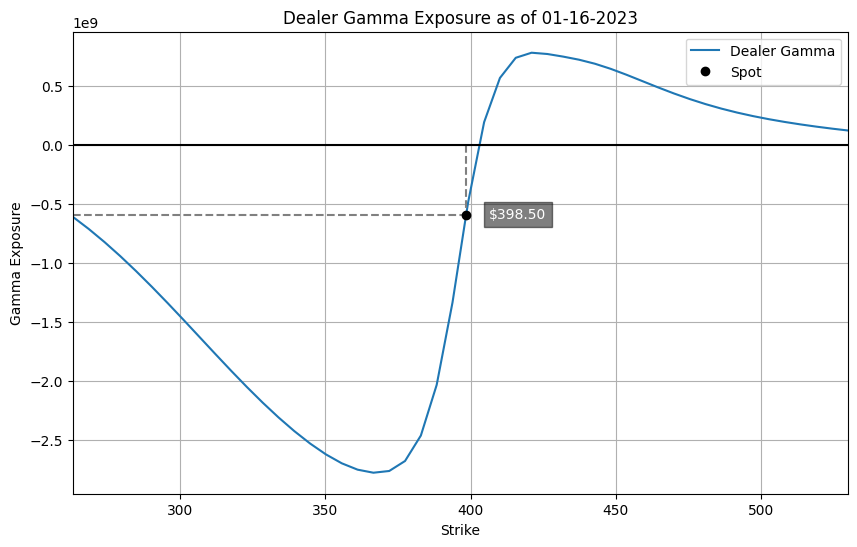

In [40]:
gex.plot(15)